In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from image_process_cs2 import data_preprocess
from sklearn import preprocessing
import numpy as np
%matplotlib inline


In [92]:
components, y = data_preprocess(['select/japanese_beetle', 'select/cucumber_beetle', 'select/ladybug'], (200,200,3), True)

214.png
201.png
177.png
149.png
161.png
60.png
48.png
216.png


/Users/millie/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


61.png
174.png
148.png
170.png
212.png
213.png
171.png
165.png
173.png
167.png
198.png
172.png
317.png
303.png
115.png
14.png
28.png
277.png
288.png
289.png
276.png
114.png
302.png
102.png
116.png
260.png
329.png
107.png
113.png
264.png
13.png
106.png
310.png
304.png
312.png
110.png
138.png
11.png
266.png
272.png
273.png
139.png
105.png
322.png
35.png
21.png
280.png
257.png
243.png
34.png
135.png
109.png
337.png
321.png
255.png
296.png
297.png
37.png
122.png
334.png
324.png
126.png
27.png
244.png
293.png
287.png
292.png
245.png
32.png
325.png
327.png
131.png
125.png
24.png
247.png
284.png
291.png
285.png
25.png
326.png
95.png
56.png
209.png
235.png
234.png
43.png
156.png
94.png
140.png
154.png
55.png
7.png
183.png
197.png
223.png
237.png
40.png
155.png
141.png
169.png
83.png
87.png
226.png
232.png
3.png
45.png
86.png
346.png
191.png
185.png
46.png
184.png
176.png
88.png
375.png
149.png
399.png
59.png
398.png
417.png
403.png
72.png
67.png
115.png
539.png
100.png
114.png
499.png
17.png
3

In [93]:
components.shape

(317, 120000)

In [94]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(components) # standardize data

In [95]:
pca = PCA(n_components=2) #pca object
X_pca = pca.fit_transform(X_scaled) # from 4 features to 2 PCA features

print("\nData after PCA into 2 components")
print("PC1\tPC2")
for i in range(5):
    print("{0:0.1f}\t{1:0.1f}".format(X_pca[i,0], X_pca[i,1]))


Data after PCA into 2 components
PC1	PC2
280.5	-92.7
-100.6	-109.5
87.3	-2.4
-57.7	-45.3
146.2	19.1


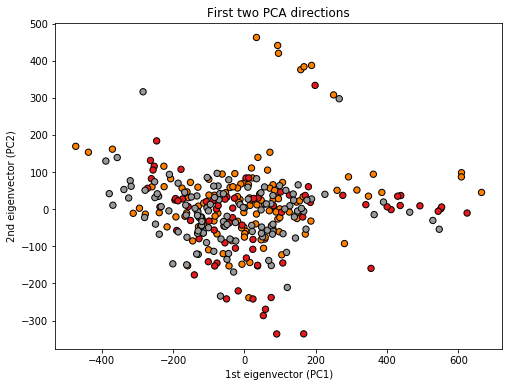

In [96]:
le = preprocessing.LabelEncoder()
le.fit(["select/japanese_beetle", "select/cucumber_beetle", "select/ladybug"])
list(le.classes_)
cm = le.transform(y) 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cm,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

In [97]:
evr = pca.explained_variance_ratio_
print(evr)
print("The 2 principal components explain {0:0.1f}%"
      " of the variance in the original data.".format(evr.sum()*100))

[0.31256813 0.09488997]
The 2 principal components explain 40.7% of the variance in the original data.


In [98]:
from sklearn import decomposition, datasets
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

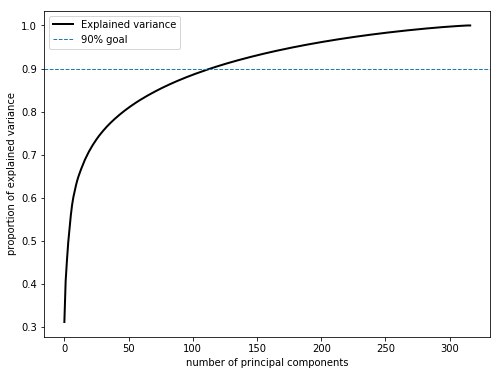

In [100]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color = 'black', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', linewidth=1)
ax.set_ylabel('proportion of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

In [91]:
#120 components